<a href="https://colab.research.google.com/github/condusinew/vaccine_failure_escape/blob/main/events_seed_SIR_mode_natimm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

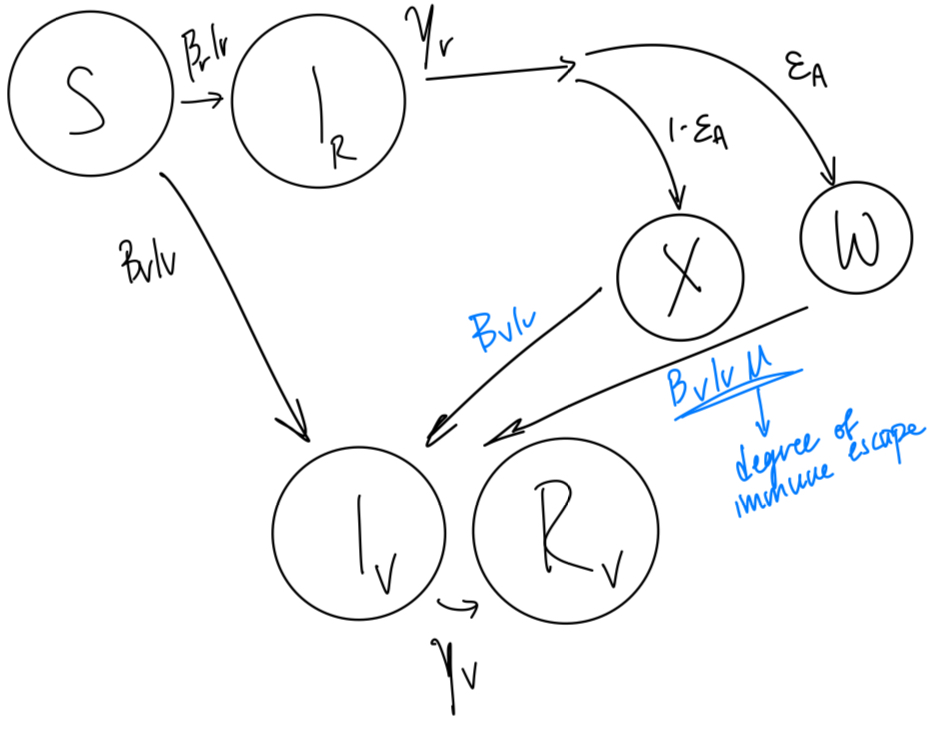

$\frac{\mathrm{d}S}{\mathrm{d}t} = -(\beta_r I_r + \beta_v I_v)S$

$\frac{\mathrm{d}I_r}{\mathrm{d}t} = \beta_r I_r S - \gamma_r I_r$

$\frac{\mathrm{d}X}{\mathrm{d}t} = (1-\epsilon_a)\gamma_rI_r - \beta_v I_v X$

$\frac{\mathrm{d}W}{\mathrm{d}t} = \epsilon_a\gamma_rI_r - \beta_v I_v (\mu) W$


$\frac{\mathrm{d}I_v}{\mathrm{d}t} = \beta_v I_v S + \beta_v I_v X + \beta_v I_v (\mu) - \gamma_v I_v$

$\frac{\mathrm{d}I_v}{\mathrm{d}t} = \gamma_v I_v$

CHANGE N AND P TO X AND Y


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [2]:
# SIR model equations
def SIR_model_rv(t, y, mu, betar, gammar, betav, gammav, epsilona):
    S, Ir, X, W, Iv, Rv,  = y
    dSdt = -(betar*Ir + betav*Iv) * S
    dIrdt = betar * Ir * S - gammar * Ir

    dXdt = (1-epsilona)*gammar * Ir - betav*Iv*X
    dWdt = epsilona * gammar * Ir - betav*Iv*mu*W

    dIvdt = betav*Iv*S + betav*Iv*X + betav*Iv*mu*W - gammav * Iv
    dRvdt = gammav * Iv

    return [dSdt, dIrdt, dXdt, dWdt, dIvdt, dRvdt]

In [3]:
# set parameter values
Rrnaught = 2.3
gammar = 1/2
betar = Rrnaught * gammar

Rvnaught = 8
gammav = 1/21
betav = Rvnaught * gammav

mu = 0
epsilona = 0.5
t = 300

# set initial conditions
S0 = 0.99
Ir0 = 0.01

X0 = 0
W0 = 0

Rv0 = 0
Iv0 = 1-(S0+Ir0+X0+W0+Rv0)


if (S0+Ir0+Iv0+Rv0+X0+W0) != 1 or Iv0 < 0:
  raise ValueError('Check initial params sum to 1')

y0 = [S0, Ir0, X0, W0, Iv0, Rv0]



In [4]:
# find time of variant arising

# run sir model (with no variant) until R = 0.1
def _reach_size10(t, y, mu, betar, gammar, betav, gammav, epsilona):
    return (y[2]+y[3]) - 0.1

_reach_size10.terminate = True

# RUN BEFORE SEEDING
# RUN WHEN Iv = 0
sol_findtv = solve_ivp(SIR_model_rv, [0,t], y0,
                 args=(mu, betar, gammar, betav, gammav, epsilona),
                 events=_reach_size10, t_eval = np.linspace(0, t, 1000)) #changed dense output to np.linspace

# get tv and seed Iv
tv = np.ravel(np.array(sol_findtv.t_events))[0]



In [5]:
tv

np.float64(4.333960341120761)

In [6]:
#solv the SIR model equations and find tv
solution = solve_ivp(SIR_model_rv,
                     [0,t],
                     y0,
                     args=(mu, betar, gammar, betav, gammav, epsilona),
                     dense_output=True,
                     t_eval=np.linspace(0, t, t + 1),)


In [7]:
#do solution up to tv
sol1 = solve_ivp(SIR_model_rv, [0,tv], y0,
                 args=(mu, betar, gammar, betav, gammav, epsilona),
                 t_eval = np.linspace(0, tv, 1000))

y_tv = sol1.y[:, -1]


proportionX = y_tv[2]/(y_tv[2]+y_tv[3])
proportionW = 1-proportionX

y_tv[2] -= 0.01*proportionX   # seed small fraction into Iv
y_tv[3] -= 0.01*proportionW
y_tv[4] = 0.01




In [8]:
sol2 = solve_ivp(
    SIR_model_rv,
    [tv, t], # start at tv
    y_tv, # use updated initial condition
    args=(mu, betar, gammar, betav, gammav, epsilona),
    t_eval = np.linspace(tv, t, 1000)
)

print(y_tv)

[0.78653126 0.11344686 0.04501094 0.04501094 0.01       0.        ]


In [9]:
sol2.y[4]

array([1.00000000e-02, 1.08149493e-02, 1.16644497e-02, 1.25451162e-02,
       1.34535736e-02, 1.43866215e-02, 1.53416972e-02, 1.63165644e-02,
       1.73098346e-02, 1.83210119e-02, 1.93504928e-02, 2.03995661e-02,
       2.14704128e-02, 2.25661068e-02, 2.36904826e-02, 2.48469197e-02,
       2.60396012e-02, 2.72727543e-02, 2.85503604e-02, 2.98761551e-02,
       3.12536283e-02, 3.26860241e-02, 3.41763408e-02, 3.57273414e-02,
       3.73422646e-02, 3.90244287e-02, 4.07767501e-02, 4.26019636e-02,
       4.45026228e-02, 4.64810999e-02, 4.85395855e-02, 5.06800890e-02,
       5.29044384e-02, 5.52142803e-02, 5.76110803e-02, 6.00962689e-02,
       6.26712986e-02, 6.53373504e-02, 6.80953061e-02, 7.09457478e-02,
       7.38889587e-02, 7.69249221e-02, 8.00533226e-02, 8.32735451e-02,
       8.65846527e-02, 8.99854846e-02, 9.34746522e-02, 9.70503442e-02,
       1.00710321e-01, 1.04451915e-01, 1.08272030e-01, 1.12167143e-01,
       1.16133299e-01, 1.20166121e-01, 1.24260984e-01, 1.28412880e-01,
      

In [10]:
t_full = np.concatenate([sol1.t, sol2.t])
y_full = np.hstack([sol1.y, sol2.y])
S, Ir, X, W, Iv, Rv = y_full


ODEINT VS SOLVE IVP


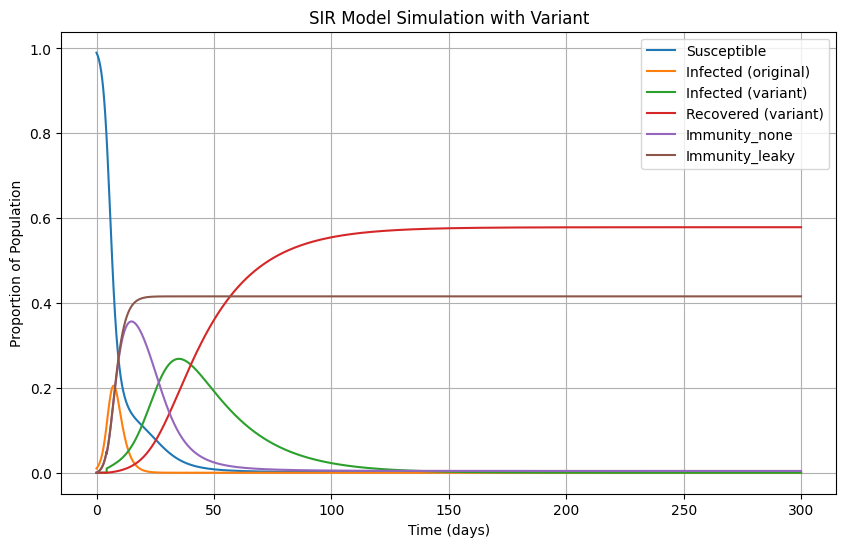

In [11]:
# Extract time and solution arrays
t = t_full
S, Ir, X, W, Iv, Rv = y_full

plt.figure(figsize=(10, 6))

plt.plot(t, S, label='Susceptible')
plt.plot(t, Ir, label='Infected (original)')

plt.plot(t, Iv, label='Infected (variant)')

plt.plot(t, Rv, label='Recovered (variant)')
plt.plot(t, X, label='Immunity_none')
plt.plot(t, W, label='Immunity_leaky')


plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model Simulation with Variant')
plt.legend()
plt.grid(True)
plt.show()


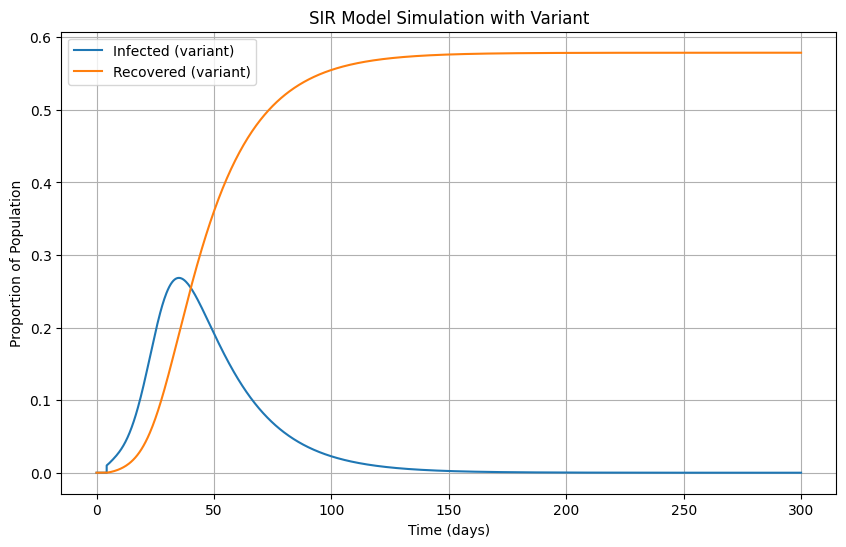

In [12]:

plt.figure(figsize=(10, 6))


plt.plot(t, Iv, label='Infected (variant)')

plt.plot(t, Rv, label='Recovered (variant)')


plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model Simulation with Variant')
plt.legend()
plt.grid(True)
plt.show()